# DSC540 Project 1

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [184]:
# Your package imports here
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You can use more than one cell, if you'd like.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
       

Good Luck!

### Keiland Pullen

**Honor Pledge:**  
I pledge on my honor that I, **Student Name**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 


## The Data

In this project, we will be working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

## Load dataset

In [5]:
# Load the dataset from UCI
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data',
header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Since this dataset does not have headers, we will read the data file that I have created.
- Last column is the target column.
- The ID column is dropped.

In [7]:
from google.colab import files

uploaded = files.upload()


Saving WisconsinBreastCancer.csv to WisconsinBreastCancer.csv


In [8]:
df = pd.read_csv('WisconsinBreastCancer.csv')
X = df.drop('target', axis=1)
y = df.target

In [9]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Question 1 [5 points]
How many people have cancer?

> Hint: Should be less than 300!

In [11]:
# Code here
total_num_Cancer = y.sum()
print (total_num_Cancer)

212


212 number of people have cancer.

### Question 2 [5 points]
Check the data and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [ ]:
df.info()

In [13]:
df.shape

(569, 31)

In [ ]:
df.head

In [ ]:
missingValues = df.isnull().sum()
print(missingValues)

This data set contains 30 columns that are of "float64" data-type and 1 column that is of "Int64" data-type. There isn't any categorical data. There are no missing values in the data set, however, there are several observations that have values on zero. There are 596 rows or observations. There are 30 variables in the feature set.

### Question 3 [5 points]
- Check the statistical summary of numeric features. Do the variables have values close to each other, or is there large differences?
- What is the variable that has the largest value?
- What is the variable that has the smallest value?

In [ ]:
# Code here
print(df.describe() )


Using the *describe* function, the Mean values for this data-set are spread out.  The largest Mean value would be 880.583128 for the "Worst area" variable.  The smallest Mean value of 0.003795 belongs to the "Fractal dimension area" variable.

### Question 4 [5 points]
These features are all engineered from images. I suspect there is some variables with large correlation. Are there largely correlated variables? Why do you think they are largely correlated? Comment on a few.
- Calculate correlation.
- Create a correlation heatmap.
- Comment on largely correlated variables.

In [21]:
df.corr()

heatMapCorr = df.corr()

heatMapCorr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


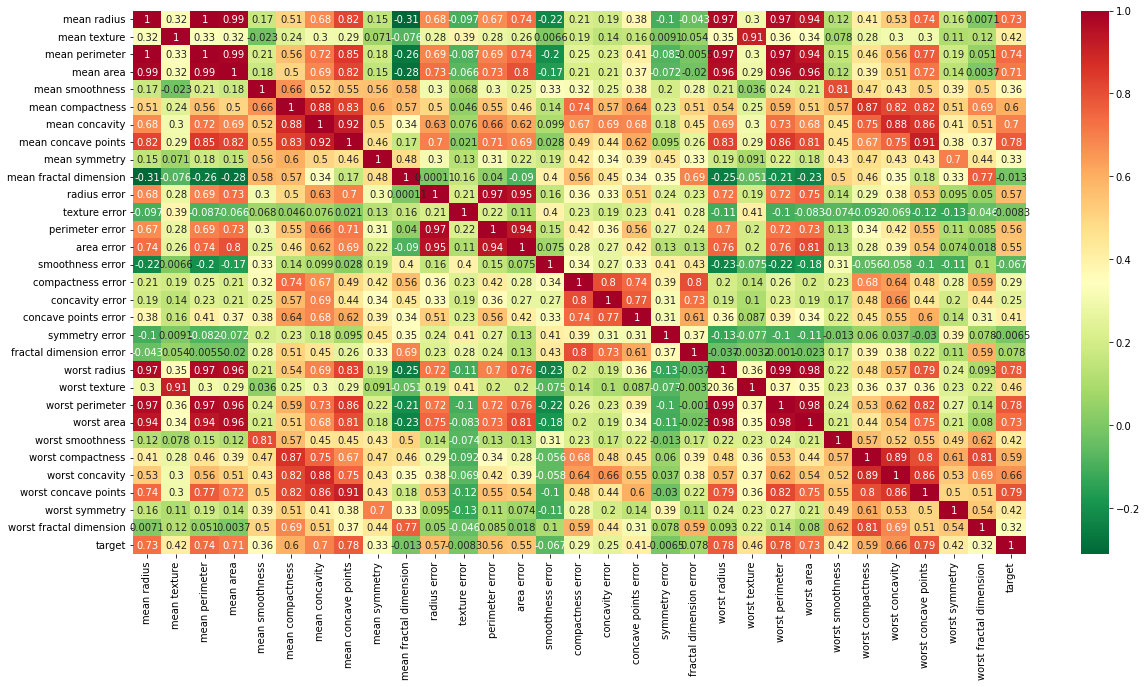

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(heatMapCorr, annot=True, cmap="RdYlGn_r");

There appears to be heavy correlation between worst area with mean radius, mean perimeter, mean area, worst radius and worst perimeter.   There is also strong correlation between worst perimeter with mean radius, mean perimeter, mean area, worst radius and worst area.  There is a stong correlation between mean radius and mean perimeter and mean area.  Strong correlations also exist between mean compactness and mean concavity.  Worst concave points also has correlation with mean concave points.   The heatmap and correlation table indicate that the above mentioned variables are a few that are strongly correlated.  

### Question 5 [5 points]
**Train - Test split** 
- Use sklearn's `tran_test_split()` function to create the split.
- Use `random_state = 55` to create consistent and repeatable train-test splits.

- What is the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
- What is the importance of stratified sampling?

In [32]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [33]:
# Code here
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 193 to 239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              426 non-null    float64
 1   mean texture             426 non-null    float64
 2   mean perimeter           426 non-null    float64
 3   mean area                426 non-null    float64
 4   mean smoothness          426 non-null    float64
 5   mean compactness         426 non-null    float64
 6   mean concavity           426 non-null    float64
 7   mean concave points      426 non-null    float64
 8   mean symmetry            426 non-null    float64
 9   mean fractal dimension   426 non-null    float64
 10  radius error             426 non-null    float64
 11  texture error            426 non-null    float64
 12  perimeter error          426 non-null    float64
 13  area error               426 non-null    float64
 14  smoothness error        

In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 276 to 112
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              143 non-null    float64
 1   mean texture             143 non-null    float64
 2   mean perimeter           143 non-null    float64
 3   mean area                143 non-null    float64
 4   mean smoothness          143 non-null    float64
 5   mean compactness         143 non-null    float64
 6   mean concavity           143 non-null    float64
 7   mean concave points      143 non-null    float64
 8   mean symmetry            143 non-null    float64
 9   mean fractal dimension   143 non-null    float64
 10  radius error             143 non-null    float64
 11  texture error            143 non-null    float64
 12  perimeter error          143 non-null    float64
 13  area error               143 non-null    float64
 14  smoothness error        

In [36]:
y_train.shape

(426,)

In [37]:
y_test.shape

(143,)

The ratio of cancer classes in the training set and test set, if correct is 426:143.


Stratified sampling divides the data set into sub-groups that have similar characteristics. Then samples from each sub-group are taken. The rationale is that the stratified sample is more reflective of the whole data population.

### Question 6 [10 points]

- Initiate the logistic regression classifier from the sklearn library as shown below.
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or use the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - False Positive Rate
     - F1 Score

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)

In [42]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [43]:
pred = clf.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

0.9413145539906104

In [44]:
pred = clf.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred)

0.986013986013986

In [46]:
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,89,1
1,1,52


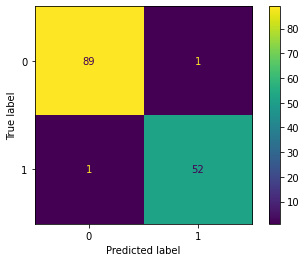

In [47]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred)

### Question 7 [10 points]

- Initiate the k-nearest neighbours classifier from the sklearn library with n_neighbors=1. Keep the remaining parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [50]:
KNN_clf = KNeighborsClassifier(n_neighbors=1)
KNN_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
knn_pred_train = KNN_clf.predict(X_train)
knn_pred_test = KNN_clf.predict(X_test)

In [52]:
#accuracy
(y_train == knn_pred_train).mean()

1.0

In [53]:
#accuracy
(y_test == knn_pred_test).mean()

0.9440559440559441

In [56]:
print(confusion_matrix(y_test, knn_pred_test ))
print(classification_report(y_test, knn_pred_test))

[[86  4]
 [ 4 49]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



### Question 8 [10 points]

- Initiate the Gaussian Naive Bayes classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [58]:
Gauss_clf = GaussianNB()
Gauss_clf.fit(X_train, y_train)


GaussianNB()

In [59]:
gauss_pred_train = Gauss_clf.predict(X_train)
gauss_pred_test = Gauss_clf.predict(X_test)

In [60]:
#accuracy
(y_train == gauss_pred_train).mean()

0.9366197183098591

In [61]:
#accuracy
(y_test == gauss_pred_test).mean()

0.958041958041958

In [62]:
print(confusion_matrix(y_test, gauss_pred_test ))
print(classification_report(y_test, gauss_pred_test))

[[89  1]
 [ 5 48]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### Question 9 [10 points]

In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
C is the inverse of the regularization parameter $\lambda$. As C increases, the penalty decreases.
- Create a loop and fit the models using each C value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Plot the validation curve based on each C value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [63]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    clf.fit(X_train, y_train)

    pred_1=clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_train, pred_1))

    pred_2=clf.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_test, pred_2))
    
    

In [64]:
accuracy_train

[0.9248826291079812,
 0.931924882629108,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347,
 0.9413145539906104,
 0.9413145539906104,
 0.9460093896713615,
 0.9483568075117371,
 0.9507042253521126,
 0.9624413145539906,
 0.971830985915493,
 0.9765258215962441,
 0.9859154929577465,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9906103286384976,
 0.9882629107981221]

In [65]:
accuracy_test

[0.9370629370629371,
 0.958041958041958,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.986013986013986,
 0.993006993006993,
 0.993006993006993,
 0.986013986013986,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.986013986013986,
 0.986013986013986,
 0.986013986013986,
 0.9790209790209791,
 0.9790209790209791,
 0.972027972027972]

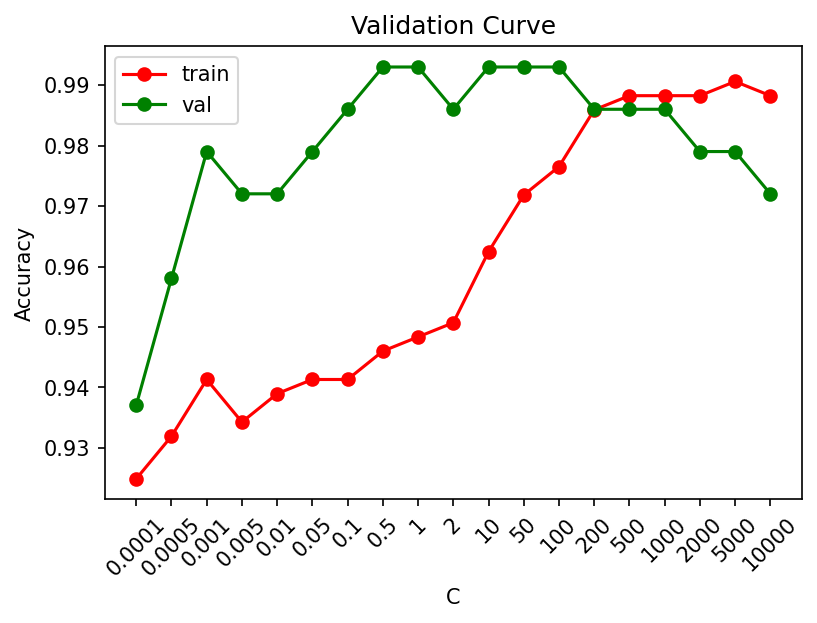

In [68]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='red', label = 'train')
plt.plot(accuracy_test, color='green', marker='o', label = 'val')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(C_list)), labels=C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Question 10 [10 points]

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each K value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [72]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)

    pred_3=clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_train, pred_3))

    pred_4=clf.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_test, pred_4))



In [73]:
accuracy_train

[1.0,
 0.9483568075117371,
 0.9460093896713615,
 0.9389671361502347,
 0.931924882629108,
 0.9248826291079812,
 0.9272300469483568,
 0.9248826291079812,
 0.9225352112676056,
 0.9225352112676056,
 0.9225352112676056,
 0.9131455399061033,
 0.9084507042253521,
 0.9014084507042254]

In [74]:
accuracy_test

[0.9440559440559441,
 0.965034965034965,
 0.9370629370629371,
 0.9440559440559441,
 0.9370629370629371,
 0.9440559440559441,
 0.9440559440559441,
 0.9370629370629371,
 0.9370629370629371,
 0.9370629370629371,
 0.9300699300699301,
 0.9230769230769231,
 0.9300699300699301,
 0.9090909090909091]

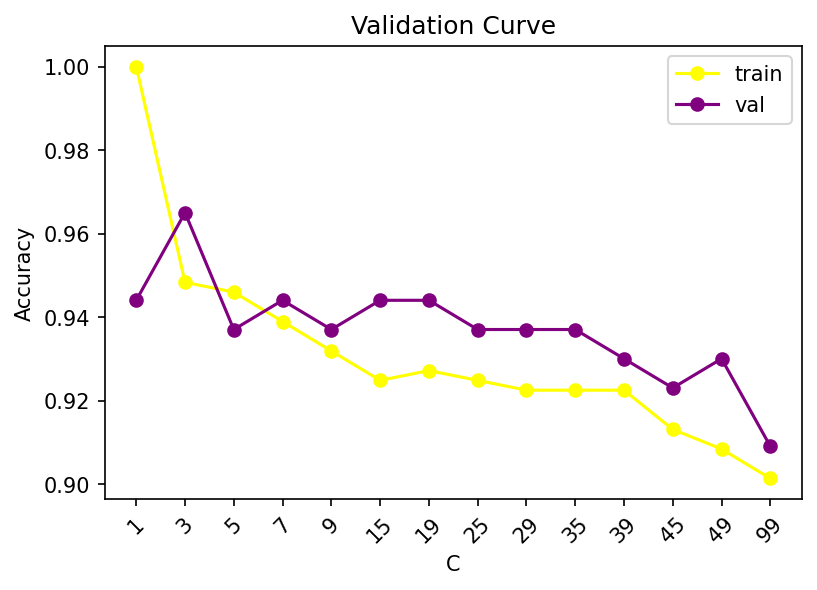

In [75]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='yellow', label = 'train')
plt.plot(accuracy_test, color='purple', marker='o', label = 'val')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Question 11 [10 points]

- The validation curve for logistic regression seems a bit weird. That might have to do with the fact that the data is not normalized.
- Apply standardization to the data and re-do Quesion 9 and plot the validation curve for logistic regression models with same parameter range for C. 
- Plot the validation curve. What do you see? 
- Which value would you choose for C in logistic regression? Why?

In [76]:
from sklearn import preprocessing

In [77]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [79]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    clf.fit(X_train_ss, y_train)

    pred_5=clf.predict(X_train_ss)
    accuracy_train.append(metrics.accuracy_score(y_train, pred_5))

    pred_6=clf.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_test, pred_6))



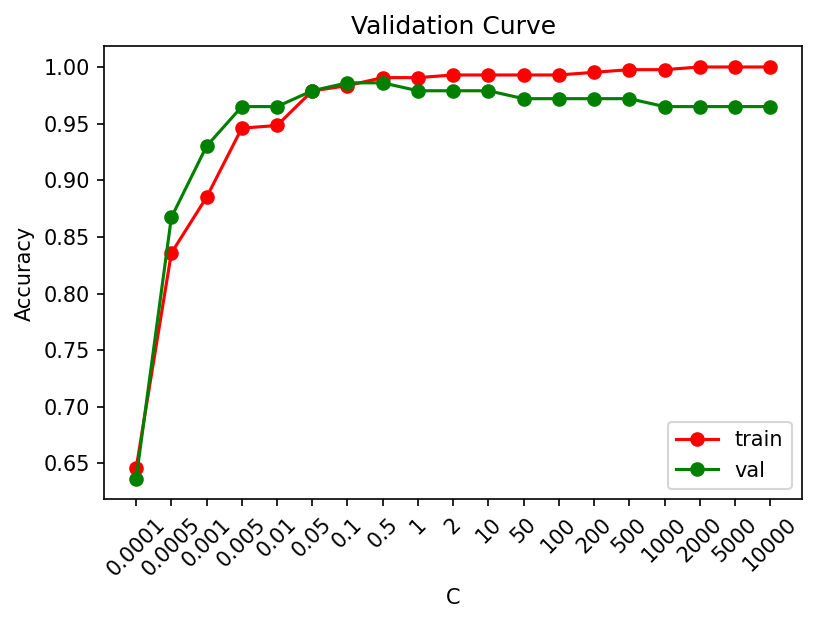

In [80]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='red', label = 'train')
plt.plot(accuracy_test, color='green', marker='o', label = 'val')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(C_list)), labels=C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The validation curve is very close to the training curve, which translates into an ideal model.  However, there may be cause for the conncern of overfitting, as the plots are very close.

The best C parameter would be 0.05 or 0.1 because that point appears to be equal in both the training and validation plots.

### Question 12 [5 points]

In [96]:
X_train_ss.shape

(426, 30)

In [97]:
X_train_ss[0:426,:].shape

(426, 30)

- After choosing your best C value, let's check the learning curve.
- Create a logistic regression model of your chosen C value, and the other parameters the same as before.
- Starting from 1 data point in the training set, increase your training set size by 1 point in each iteration, fit the model, get the accuracy scores for both the current training and test sets.
- Increase the training set size consecutively. Do not randomly select data points. (`X_train_ss[0:N,:] where N = {1,2,3,...,len(X_train_ss)}`)
- Plot the learning curve. What do you see? Comment on your finding. 

In [98]:
X_train_ss.shape

(426, 30)

In [175]:
accuracy_train = []
accuracy_test = []

num_points = list(range(5, X_train_ss.shape[0], 25))

for n in num_points:
    clf = LogisticRegression(max_iter = 1000, solver='lbfgs', penalty='l2', C=0.05, verbose=0)
    
    clf.fit(X_train_ss[0:n, :], y_train[0:n])
    
    pred_train = clf.predict(X_train_ss[0:n, :])
    accuracy_train.append(metrics.accuracy_score(y_train[0:n], pred_train))

    pred_test = clf.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_test, pred_test))



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lo

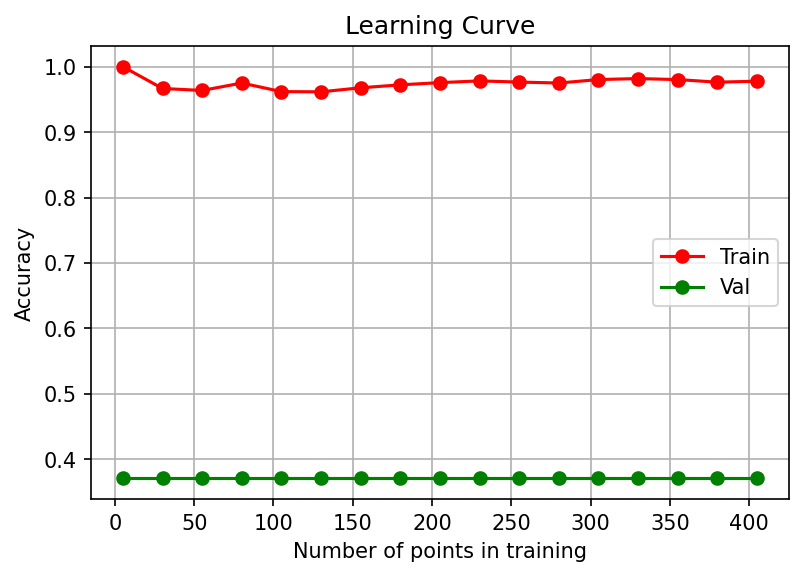

In [176]:
f, ax = plt.subplots(dpi=150)
ax.plot(num_points, accuracy_train, marker='o', color='red', label='Train')
ax.plot(num_points, accuracy_test, marker='o', color='green', label='Val')
ax.set_xlabel('Number of points in training')
ax.set_ylabel('Accuracy')
ax.set_title("Learning Curve")
ax.legend()
ax.grid()

For the learning curve, I'm concerned that there is a miscalculation as the Validation plot is a straight line.

### Question 13 [5 points]

- Before applying KNN, it is important to scale the features. 
- Use the standardized train and test sets re-do Quesion 10 and plot the validation curve for KNN models with same parameter range for K. 
- Plot the validation curve. What do you see? 
- Which value would you choose for K in nearest neighbor model?

In [180]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)

    pred_scale1=clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_train, pred_scale1))

    pred_scale2=clf.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_test, pred_scale2))

In [181]:
accuracy_train

[1.0,
 0.9835680751173709,
 0.9788732394366197,
 0.971830985915493,
 0.971830985915493,
 0.9577464788732394,
 0.960093896713615,
 0.9530516431924883,
 0.9483568075117371,
 0.9530516431924883,
 0.9530516431924883,
 0.9460093896713615,
 0.9483568075117371,
 0.9248826291079812]

In [182]:
accuracy_test

[0.951048951048951,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.951048951048951]

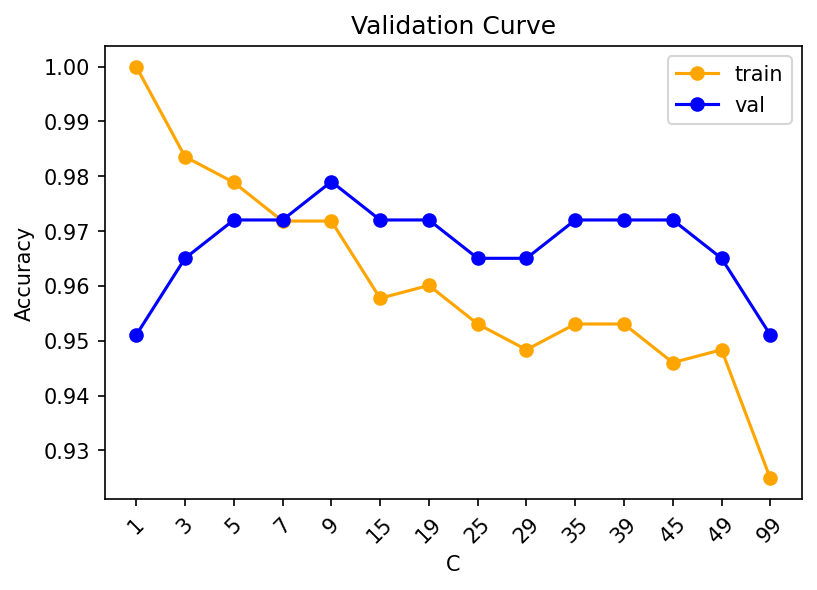

In [183]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='orange', label = 'train')
plt.plot(accuracy_test, color='blue', marker='o', label = 'val')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It appears that there at C=7, there is a 97% accuracy with both the Training plot and Validation plot.

# Question 14 [10 points]


*     Using only the classifier models of logistic regression, Gaussian Naive Bayes, or KNN models:
**    Think of other ways of improving the accuracy and list at least 
two possibilities.
**    Implement one of the methods you proposed.
**    Is the model accuracy increasing? Why do you think this might have helped?
**   If it not increasing, try the other method you proposed. Why do you think this might have helped?
**   If none of them did not improve, comment on why this might have been the case.
**   If you have time try a few more solutions and see which one works.



In [ ]:
Two ways to improve the accuracy of these classifiers could be by using Dimensionality Reduction or Cross Validation.



In [187]:
knn_cv = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

print(cv_scores)
print(np.mean(cv_scores))

[0.97674419 0.97647059 0.97647059 0.98823529 0.94117647]
0.9718194254445965


Using Cross-Validation the mean is 97% which is consistent with the range of values in the accuracy for the training data set.  

An improvement could be the addition of more data.